## Predict Sentiment From Movie Reviews
- IMDB sentiment analysis problem for natural language processing
- Use word embedding in Keras for natural language problems.
- Develop and evaluate a Multilayer Perceptron model for the IMDB problem.
- Develop a one-dimensional convolutional neural network model for the IMDBproblem


In [32]:
import numpy as np
from keras.datasets import imdb
from matplotlib import pyplot as plt
from keras.preprocessing import sequence
from keras.layers import Embedding

In [2]:
#get the data
(X_train,y_train),(X_test,y_test) = imdb.load_data()
X = np.concatenate((X_train, X_test),axis =0)
y = np.concatenate((y_train, y_test),axis =0)

In [3]:
#get the data shape
print(X.shape)
print(y.shape)

(50000,)
(50000,)


In [5]:
#what are class values
print(np.unique(y))

[0 1]


Binary classification problem - good and bad

In [6]:
#get the number of words
print(len(np.unique(np.hstack(X))))

88585


In [21]:
result = map(len,X)
result = list(result)
np.mean(result)

234.75892

Mean 234.76 words (172.911495)


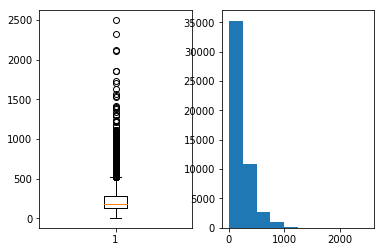

In [22]:
#get the average review length and std
result = list(map(len,X))
print("Mean %.2f words (%f)" % (np.mean((result)), np.std((result))))
# plot review length as a boxplot and histogram
plt.subplot(121)
plt.boxplot(result)
plt.subplot(122)
plt.hist(result)
plt.show()

From box and whisker plot see exponential distribution, mass probably in length 400-500 words

### Word Embeddings in Keras
Word embedding - where words are encoded as real-valued vectors in a high dimensional space, where
the similarity between words in terms of meaning translates to closeness in the vector space.
Discrete words are mapped to vectors of continuous numbers. This is useful when working with
natural language problems with neural networks as we require numbers as input values.

In Keras convert positive integer representations of words into a
word embedding by an **Embedding** layer4.  The layer takes arguments that define the mapping
including the maximum number of expected words also called the vocabulary size.  The layer also allows you to specify the
dimensionality for each word vector, called the output dimension.


Imagine only required fist 5000 words in IMDB dataset, use a 32-dimensional vector to represent each word.Also cap max length of review to 500 words.  Use Keras utils to set datset to length of 500 words.  Then first layer of CNN would be a word embedded layer

In [33]:
imdb.load_data(num_words=5000)
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)
Embedding(5000, 32, input_length=500)


### Simple Multilayer Perceptron Model
Develop a simple Multilayer Perceptron Model with a single hidden layer.

In [35]:
# MLP for the IMDB problem
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)


In [36]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
#truncate a 500 words (shorter reviews zero padded)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

Use an Embedding layer as the input layer, setting
the vocabulary to 5,000, the word vector size to 32 dimensions and the input length to 500.
The output of this first layer will be a 32 × 500 sized matrix as above.
Flatten the Embedding layers output to one dimension, then use one dense hidden layer
of 250 units with a rectifier activation function. The output layer has one neuron and will use a
sigmoid activation to output values of 0 and 1 as predictions. The model uses logarithmic loss
and is optimized using the efficient ADAM optimization procedure

In [37]:
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
# Fit the model - try some different settings
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 6s 230us/step - loss: 0.5106 - acc: 0.7108 - val_loss: 0.3267 - val_acc: 0.8571
Epoch 2/2
25000/25000 [==============================] - 3s 126us/step - loss: 0.1908 - acc: 0.9272 - val_loss: 0.3006 - val_acc: 0.8731
Accuracy: 87.31%


### One-Dimensional Convolutional Neural Network

Convolutional neural networks were designed to honor the spatial structure in image data whilst
being robust to the position and orientation of learned objects in the scene. This same principle
can be used on sequences, such as the one-dimensional sequence of words in a movie review.
The same properties that make the CNN model attractive for learning to recognize objects in
images can help to learn structure in paragraphs of words, namely the techniques invariance to
the specific position of features.
Keras supports one dimensional convolutions and pooling by the Conv1D and MaxPooling1D
classes respectively

In [39]:
# CNN for the IMDB problem
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# pad dataset to a maximum review length in words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)


Instead now after Embedding input layer, insert a **Conv1D** layer.  This convolutional layer has 32 feature maps and reads
embedded word representations 3 vector elements of the word embedding at a time. The
convolutional layer is followed by a MaxPooling1D layer with a length and stride of 2 that halves
the size of the feature maps from the convolutional layer. The rest of the network is the same
as the neural network above

In [41]:
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
_________________________________________________________________


Convolutional layer preserves the dimensionality of our Embedding
input layer of 32 dimensional input with a maximum of 500 words. The pooling layer compresses
this representation by halving it.

In [42]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128,verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
 - 5s - loss: 0.4694 - acc: 0.7394 - val_loss: 0.2778 - val_acc: 0.8841
Epoch 2/2
 - 4s - loss: 0.2194 - acc: 0.9141 - val_loss: 0.2751 - val_acc: 0.8852
Accuracy: 88.52%


Small improvement in accuracy but also faster - less params used